In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 6.1

Give the percentage of red (X), green (Y) and blue (Z) light required to generate the point labelled "warm white" in the chromatic diagram given in the image below.

![chromaticity](chromaticity.png)

## Solution

The amount of red, green and blue in any colour is called the _tristimulus_ values and are:

$$x = \frac{X}{X+Y+Z}, y = \frac{Y}{X+Y+Z}, z = \frac{X}{X+Y+Z}$$

such that $x+y+z=1$. 

In orde to use the CIA _chromaticity diagram_ above, we need to read off the $x$ and $y$ value and find $z=1-(x+y)$.

For the point marked "warm white" we read off $x\approx0.42$ and $y\approx0.40$ which means that:

In [39]:
x = 0.42
y = 0.40
z = 1-(x+y)
trichromatic_coefficients = np.array([x, y, z])

print("Trichromatic coefficients: ", trichromatic_coefficients)

Trichromatic coefficients:  [0.42 0.4  0.18]


r: 0.418,
 g: 0.401,
 b: 0.181


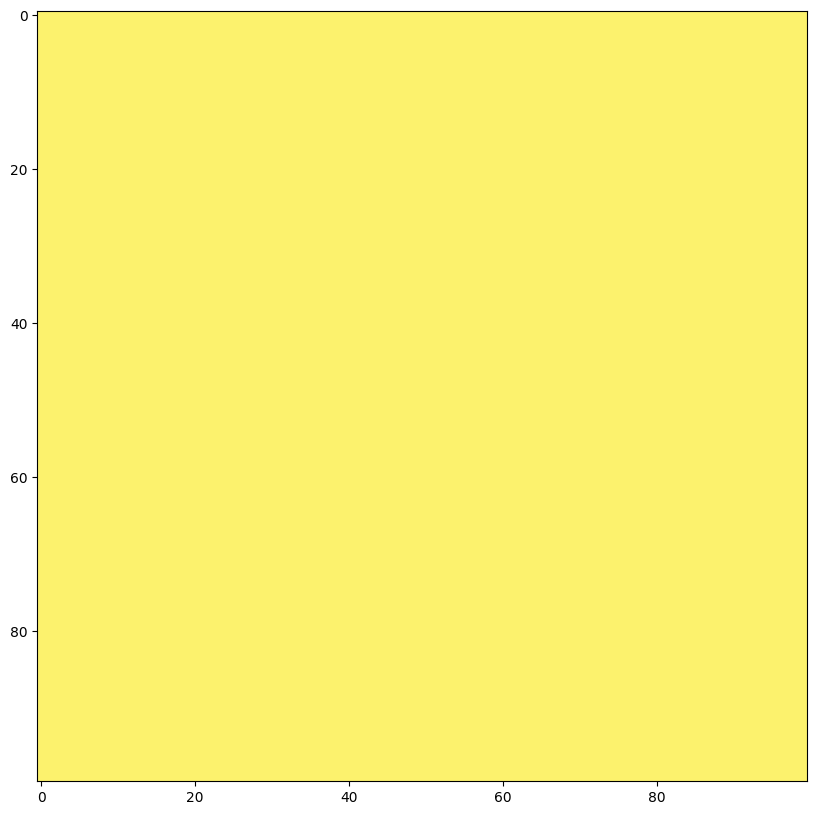

In [40]:
R = 0.99
G = 0.95
B = 0.43
r = R / (R + G + B)
g = G / (R + G + B)
b = B / (R + G + B)

print(f"r: {r:.3f},\n g: {g:.3f},\n b: {b:.3f}")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.array([R,G,B])*np.ones((100,100,3)))
plt.show()

# 6.2 

The R, G, B components images of an RGB image have the horizontal intensity profiles shown in the diagram in the figure below. What colour would a person see in the middle column of the image?

![rgbcomponents](rgb_components.png)

## Solution

At the centre of the image, the RGB value will be $rgb = [0.5, 1, 0.5]$ which corresponds to a light green colour. 

In [41]:
# We can visualise this

# Profile parametrizations
N = 100
r = np.linspace(1,0,N)
g = np.concatenate([np.linspace(0,1,N//2), np.linspace(1,0,N//2)])
b = np.linspace(0,1,N)

# Stack the vectors and inspect the shapes
print(f"Shape of r,b,g vetors: {r.shape}, {g.shape}, {b.shape}")
stacked_img = np.stack([r,g,b], axis=1)
print(f"Shape of stacked_img: {stacked_img.shape}")
tiled_img = np.tile(stacked_img, reps=(N,1,1))
print(f"Shape of tiled_img: {tiled_img.shape}")


Shape of r,b,g vetors: (100,), (100,), (100,)
Shape of stacked_img: (100, 3)
Shape of tiled_img: (100, 100, 3)


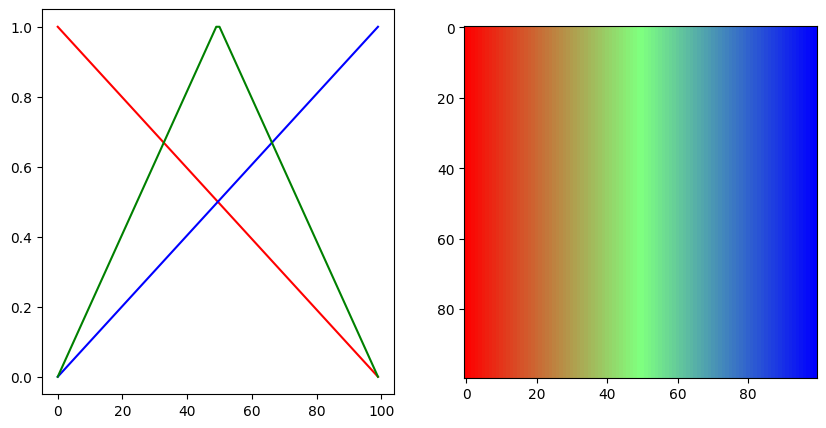

In [42]:
# Plot
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
ax[0].plot(r, c="r")
ax[0].plot(b, c="b")
ax[0].plot(g, c="g")
ax[1].imshow(tiled_img)

# 6.3

Consider the RGB cube in the figure below:
Describe how the gray levels vary in each of the R, G, and B primary images that
make up the front face of the colour cube (front side). Assume that each component
image is an 8-bit image.

![colorcube](colorcube.png)

## Solution

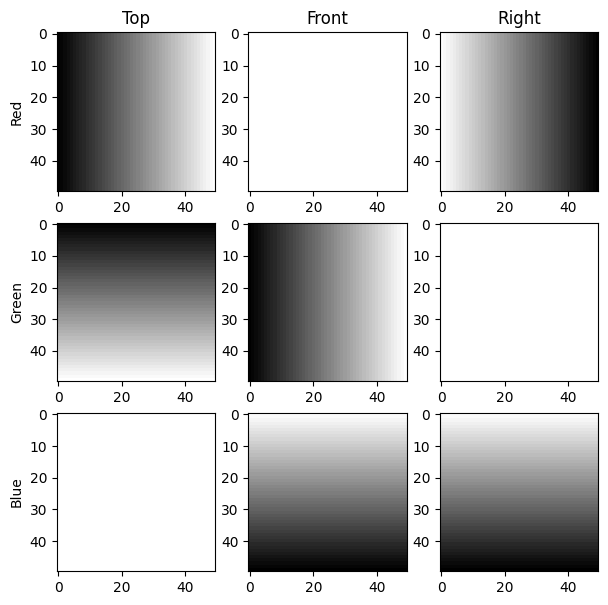

In [43]:
n_steps = 50
vec = np.linspace(0,1,n_steps)

fig,ax = plt.subplots(3,3, figsize=(7,7))

## The top face of the color cube is where B=1
blue_top = np.ones((n_steps,n_steps))
red_top = np.tile(vec, (n_steps,1))
green_top = np.tile(vec[::-1], (n_steps,1))
green_top = np.rot90(green_top)
top = np.stack([red_top, green_top, blue_top], axis=2)

ax[0,0].imshow(red_top, cmap="gray", vmin=0, vmax=1)
ax[1,0].imshow(green_top, cmap="gray", vmin=0, vmax=1)
ax[2,0].imshow(blue_top, cmap="gray", vmin=0, vmax=1)
ax[0,0].set_title("Top")


## The front face is where R=1
red_front = np.ones((n_steps,n_steps))
blue_front = np.tile(vec, (n_steps,1))
blue_front = np.rot90(blue_front)
green_front = np.tile(vec, (n_steps,1))
green_front = np.rot90(green_top)
front = np.stack([red_top, green_top, blue_top], axis=2)

ax[0,1].imshow(red_front, cmap="gray", vmin=0, vmax=1)
ax[1,1].imshow(green_front, cmap="gray", vmin=0, vmax=1)
ax[2,1].imshow(blue_front, cmap="gray", vmin=0, vmax=1)
ax[0,1].set_title("Front")


## The right face is where G=1
green_right = np.ones((n_steps,n_steps))
blue_right = np.tile(vec, (n_steps,1))
blue_right = np.rot90(blue_right)
red_right = np.tile(vec[::-1], (n_steps,1))
right = np.stack([red_top, green_top, blue_top], axis=2)

ax[0,2].imshow(red_right, cmap="gray", vmin=0, vmax=1)
ax[1,2].imshow(green_right, cmap="gray", vmin=0, vmax=1)
ax[2,2].imshow(blue_right, cmap="gray", vmin=0, vmax=1)
ax[0,2].set_title("Right")

## Label the colors
ax[0,0].set_ylabel("Red")
ax[1,0].set_ylabel("Green")
ax[2,0].set_ylabel("Blue")

plt.show()